In [1]:
import pandas as pd
import numpy as np

In [2]:
crimes_df = pd.read_csv("Crimes.csv")
print("Completo el cargado")

Completo el cargado


In [3]:
crimes_df

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,12.0,61.0,08B,1165074.0,1875917.0,2015,02/10/2018 03:50:01 PM,41.815117,-87.670000,"(41.815117282, -87.669999562)"
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,29.0,25.0,06,1138875.0,1904869.0,2015,02/10/2018 03:50:01 PM,41.895080,-87.765400,"(41.895080471, -87.765400451)"
2,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,10224740,HY411595,09/05/2015 12:45:00 PM,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,...,35.0,21.0,18,1152037.0,1920384.0,2015,02/10/2018 03:50:01 PM,41.937406,-87.716650,"(41.937405765, -87.716649687)"
4,10224741,HY411610,09/05/2015 01:00:00 PM,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,...,28.0,25.0,08A,1141706.0,1900086.0,2015,02/10/2018 03:50:01 PM,41.881903,-87.755121,"(41.881903443, -87.755121152)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7336576,12381478,JE247828,05/30/2021 12:15:00 PM,061XX S DR MARTIN LUTHER KING JR DR,5011,OTHER OFFENSE,LICENSE VIOLATION,CONVENIENCE STORE,False,False,...,20.0,40.0,26,1179972.0,1864490.0,2021,06/06/2021 04:53:22 PM,41.783432,-87.615702,"(41.783432002, -87.615701737)"
7336577,12380856,JE248913,05/30/2021 12:00:00 PM,046XX S ELLIS AVE,0810,THEFT,OVER $500,APARTMENT,False,True,...,4.0,39.0,06,1183699.0,1874469.0,2021,06/06/2021 04:53:22 PM,41.810729,-87.601726,"(41.810729022, -87.601726053)"
7336578,12380390,JE248367,05/30/2021 10:00:00 PM,052XX W JACKSON BLVD,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,RESIDENCE,False,False,...,29.0,25.0,04B,1141403.0,1898167.0,2021,06/06/2021 04:53:22 PM,41.876643,-87.756281,"(41.87664306, -87.756281157)"
7336579,12380107,JE248051,05/30/2021 12:05:00 PM,003XX S CANAL ST,2024,NARCOTICS,POSSESS - HEROIN (WHITE),STREET,True,False,...,42.0,28.0,18,1173193.0,1898563.0,2021,06/06/2021 04:53:22 PM,41.877084,-87.639547,"(41.877083893, -87.639546848)"


In [4]:
print(len(crimes_df))

7336581


In [9]:
crimes_drop=crimes_df.dropna()

In [11]:
print(len(crimes_drop))
print("porcentaje eliminado: ",str((1-len(crimes_drop)/len(crimes_df))*100)+"%")

6651535
porcentaje eliminado:  9.33740116820083%


In [12]:
crimes_df.isna().sum()

ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      8293
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614837
Community Area          613484
FBI Code                     0
X Coordinate             72875
Y Coordinate             72875
Year                         0
Updated On                   0
Latitude                 72875
Longitude                72875
Location                 72875
dtype: int64

In [14]:
sum(crimes_df.duplicated())

0

In [3]:
crimes_sel = crimes_df[(crimes_df["X Coordinate"].notnull()) & (crimes_df["Y Coordinate"].notnull())]

Para nuestro caso consideramos que un crimes sin ubicacion es poco util, si deberiamos llenar esos campos necesitariamos algun campo extra, dado que nuestro analisis es espacio temporal.

In [18]:
crimes_sel.isna().sum()

ID                           0
Case Number                  3
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      5411
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    605582
Community Area          604280
FBI Code                     0
X Coordinate                 0
Y Coordinate                 0
Year                         0
Updated On                   0
Latitude                     0
Longitude                    0
Location                     0
dtype: int64

El location Description es un campo que es muy importante, sin embargo no podemos llenarlo de manera convencional por ser texto, el distrito podemos calcularlo usando las coordenadas del evento, lo mismo para el community area, ward tambien depende de la ubicacion del proyecto, es posible calcularlo.

In [25]:
crimes_sel.groupby("Primary Type").size()

Primary Type
ARSON                                  12275
ASSAULT                               465347
BATTERY                              1338617
BURGLARY                              408523
CONCEALED CARRY LICENSE VIOLATION        732
CRIM SEXUAL ASSAULT                    26395
CRIMINAL DAMAGE                       831712
CRIMINAL SEXUAL ASSAULT                 2836
CRIMINAL TRESPASS                     205523
DECEPTIVE PRACTICE                    298570
DOMESTIC VIOLENCE                          1
GAMBLING                               14500
HOMICIDE                               11088
HUMAN TRAFFICKING                         68
INTERFERENCE WITH PUBLIC OFFICER       17562
INTIMIDATION                            4303
KIDNAPPING                              6966
LIQUOR LAW VIOLATION                   14378
MOTOR VEHICLE THEFT                   335042
NARCOTICS                             727586
NON - CRIMINAL                            38
NON-CRIMINAL                             1

In [10]:
grouped = crimes_sel.groupby("Primary Type")
class_labels = ['ARSON', 'ASSAULT', 'BATTERY','BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
               'DOMESTIC VIOLENCE','GAMBLING','HOMICIDE','HUMAN TRAFFICKING','INTERFERENCE WITH PUBLIC OFFICER','INTIMIDATION','KIDNAPPING','LIQUOR LAW VIOLATION','MOTOR VEHICLE THEFT','NARCOTICS','NON - CRIMINAL','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)','OBSCENITY','OFFENSE INVOLVING CHILDREN','OTHER NARCOTIC VIOLATION','OTHER OFFENSE','PROSTITUTION','PUBLIC INDECENCY','PUBLIC PEACE VIOLATION','RITUALISM','ROBBERY','SEX OFFENSE','STALKING','THEFT','WEAPONS VIOLATION']
data=[]
for i in class_labels:
    data.append(grouped.get_group(i))

In [67]:
grouped = crimes_df.groupby("Primary Type")
class_labels = ['ARSON', 'ASSAULT', 'BATTERY','BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
               'DOMESTIC VIOLENCE','GAMBLING','HOMICIDE','HUMAN TRAFFICKING','INTERFERENCE WITH PUBLIC OFFICER','INTIMIDATION','KIDNAPPING','LIQUOR LAW VIOLATION','MOTOR VEHICLE THEFT','NARCOTICS','NON - CRIMINAL','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)','OBSCENITY','OFFENSE INVOLVING CHILDREN','OTHER NARCOTIC VIOLATION','OTHER OFFENSE','PROSTITUTION','PUBLIC INDECENCY','PUBLIC PEACE VIOLATION','RITUALISM','ROBBERY','SEX OFFENSE','STALKING','THEFT','WEAPONS VIOLATION']
data_nan=[]
for i in class_labels:
    data_nan.append(grouped.get_group(i))

In [7]:
for i in range(len(data)):
    print(class_labels[i])
    print(data[i].isna().sum())
    print(" ")

ARSON
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       1
Arrest                     0
Domestic                   0
Beat                       0
District                   0
Ward                    1296
Community Area          1297
FBI Code                   0
X Coordinate               0
Y Coordinate               0
Year                       0
Updated On                 0
Latitude                   0
Longitude                  0
Location                   0
dtype: int64
 
ASSAULT
ID                          0
Case Number                 1
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        2
Arrest                      0
Domestic                    0
Beat                        0
Dis

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        1
Arrest                      0
Domestic                    0
Beat                        0
District                    5
Ward                    32403
Community Area          32286
FBI Code                    0
X Coordinate                0
Y Coordinate                0
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                    0
dtype: int64
 
NARCOTICS
ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        1
Arrest                      0
Domestic                    0
Beat           

ID                          0
Case Number                 0
Date                        0
Block                       0
IUCR                        0
Primary Type                0
Description                 0
Location Description        4
Arrest                      0
Domestic                    0
Beat                        0
District                    5
Ward                    22821
Community Area          22839
FBI Code                    0
X Coordinate                0
Y Coordinate                0
Year                        0
Updated On                  0
Latitude                    0
Longitude                   0
Location                    0
dtype: int64
 
SEX OFFENSE
ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description       0
Arrest                     0
Domestic                   0
Beat                   

In [18]:
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
sns.set(rc={'figure.figsize':(15,15)})

separado=data[0].loc[: , ['Latitude', 'Longitude']]
grafica=sns.scatterplot(data=separado, x="Longitude", y="Latitude");

#grafica.set_xlim(41.625, 42.04)
#grafica.set_ylim(-87.88, -87.51)

AttributeError: 'list' object has no attribute 'loc'

In [63]:
kmeans = KMeans(n_clusters=20).fit(separado)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 41.90917583 -87.72188189]
 [ 41.77910314 -87.6560443 ]
 [ 41.75835558 -87.60724005]
 [ 41.85876459 -87.64588941]
 [ 41.73738539 -87.65475622]
 [ 41.69348404 -87.5459486 ]
 [ 41.95229972 -87.71737457]
 [ 41.81108322 -87.68330801]
 [ 41.77473194 -87.70176596]
 [ 41.68919787 -87.62970055]
 [ 41.92933226 -87.76459262]
 [ 41.80569829 -87.62019938]
 [ 41.88843992 -87.75531064]
 [ 41.85810705 -87.71430528]
 [ 41.74731032 -87.56501204]
 [ 41.90137066 -87.68367081]
 [ 41.94734749 -87.65941065]
 [ 41.96909734 -87.79566739]
 [ 41.99947077 -87.67875536]
 [ 41.79137309 -87.74872992]]


In [51]:
coords = []
for i in centroids:
    nuevo=[]
    nuevo.append('Cluster')
    for k in i:
        nuevo.append(k)
    coords.append(nuevo)
my_array = np.array(coords)
df = pd.DataFrame(my_array, columns = ['Primary Type','Latitude','Longitude'])
print(df)

   Primary Type            Latitude           Longitude
0       Cluster  41.999891622282206  -87.67941285734662
1       Cluster  41.791228913815424  -87.66163914028972
2       Cluster   41.89618174069683  -87.65878558951131
3       Cluster  41.887652477768235  -87.75400344412589
4       Cluster   41.75447739834679  -87.65080472865796
5       Cluster   41.74741493248757  -87.56343074076864
6       Cluster   41.69100528091925  -87.63214497205088
7       Cluster  41.926671782820385  -87.75770189164204
8       Cluster  41.805858477098745  -87.69901761587971
9       Cluster  41.800987536708504  -87.61791569323684
10      Cluster   41.85852912427299  -87.71431513468295
11      Cluster  41.846592583962966  -87.65337489593372
12      Cluster   41.90744249475379  -87.71197676687244
13      Cluster  41.693572596276425   -87.5460498349309
14      Cluster   41.95157744675832  -87.71772723602277
15      Cluster  41.951242046970236  -87.66248062300298
16      Cluster  41.755358080891334  -87.6035974

In [64]:
separado=data[0].loc[: , ['Primary Type','Latitude', 'Longitude']]
con_clusters = pd.concat([separado.assign(dataset='set1'), df.assign(dataset='set2')])

In [65]:
con_clusters

,Primary Type,Latitude,Longitude,dataset
602,ARSON,41.7676,-87.6724,set1
1210,ARSON,41.8982,-87.7336,set1
2004,ARSON,41.7348,-87.6085,set1
2769,ARSON,41.7642,-87.665,set1
3356,ARSON,41.8763,-87.7451,set1
...,...,...,...,...
15,Cluster,41.951242046970236,-87.66248062300298,set2
16,Cluster,41.755358080891334,-87.60359745226872,set2
17,Cluster,41.95990501134304,-87.79354873554045,set2
18,Cluster,41.768261419533104,-87.70106096554329,set2


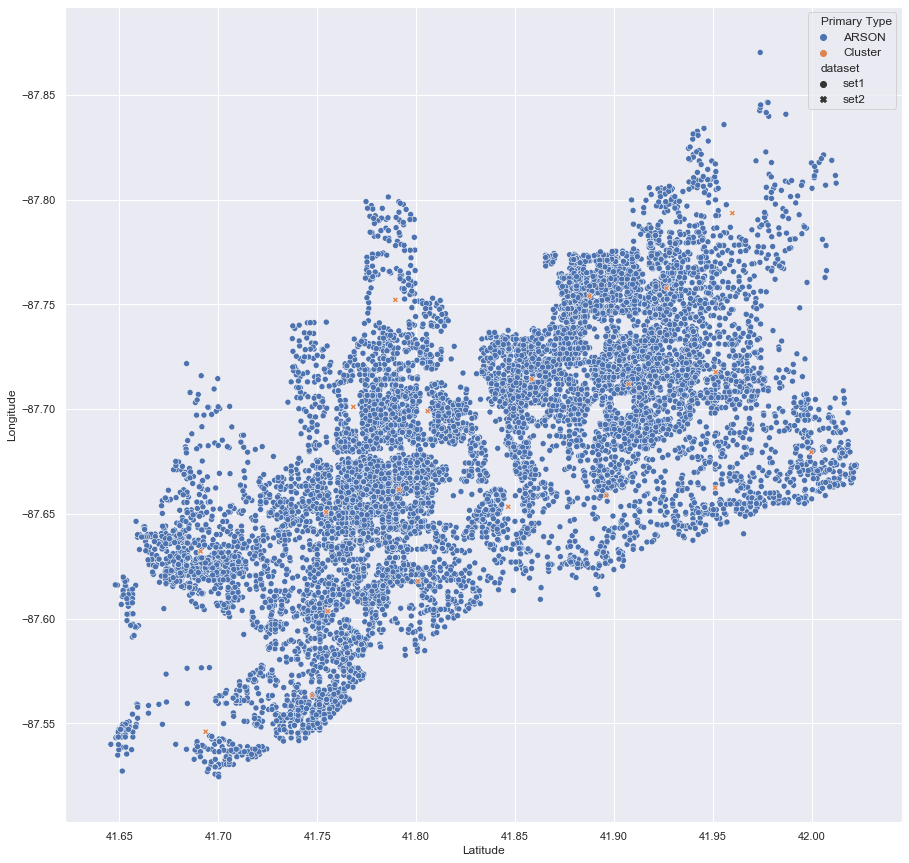

In [66]:
sns.scatterplot(x='Latitude', y='Longitude', data=con_clusters,hue="Primary Type", style='dataset')
plt.show()

In [74]:
import random

#llenar con los centroides calculados
for index, row in data_nan[0].iterrows():
    if(np.isnan(row['Latitude'])):
        row['Latitude']=centroids[random.randint(0,19)][0]
    if(np.isnan(row['Longitude'])):
        row['Latitude']=centroids[random.randint(0,19)][1]

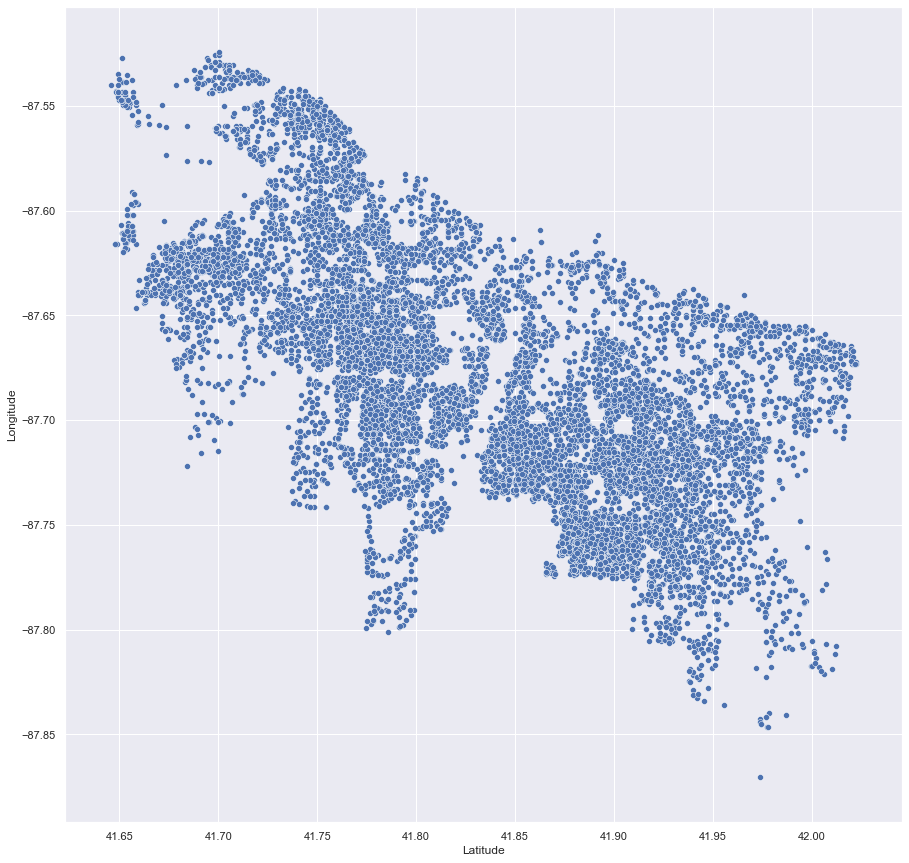

In [75]:
separado=data_nan[0].loc[: , ['Latitude', 'Longitude']]
grafica=sns.scatterplot(data=separado, x="Latitude", y="Longitude");

#grafica.set_xlim(41.625, 42.04)
#grafica.set_ylim(-87.88, -87.51)

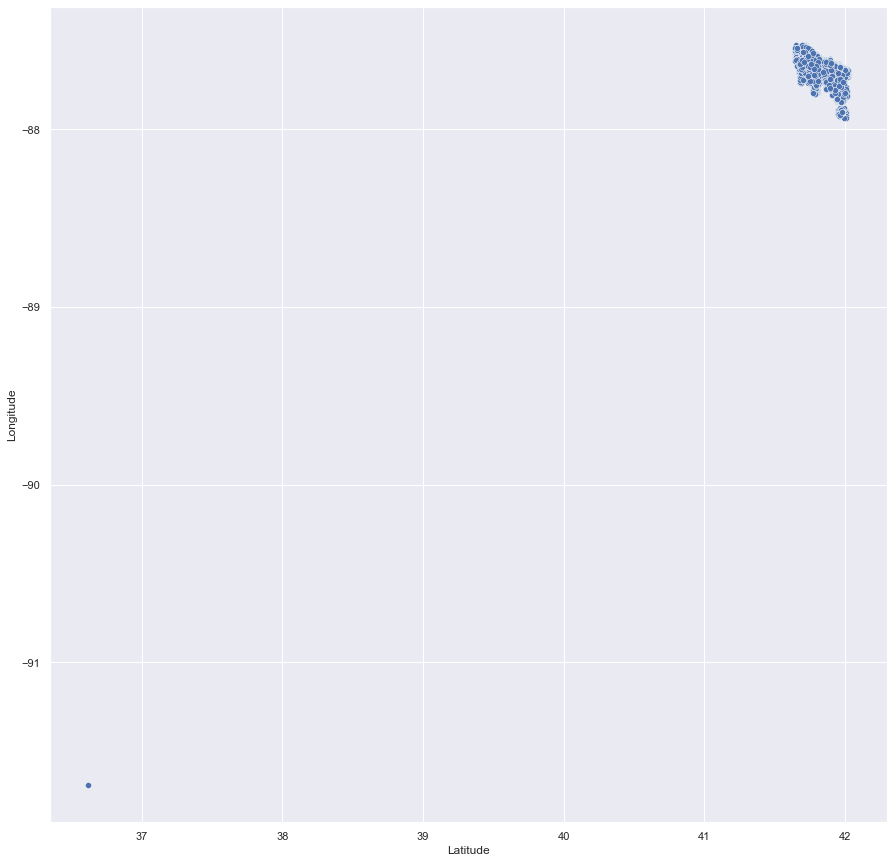

In [44]:
separado=data[1].loc[: , ['Latitude', 'Longitude']]
sns.scatterplot(data=separado, x="Latitude", y="Longitude");

In [26]:
malo = separado[(separado["Latitude"]<40 ) & (separado["Longitude"]<-87.7 )]
print(malo)

          Latitude  Longitude
5057316  36.619446 -91.686566
5344551  36.619446 -91.686566
5973680  36.619446 -91.686566
6506941  36.619446 -91.686566


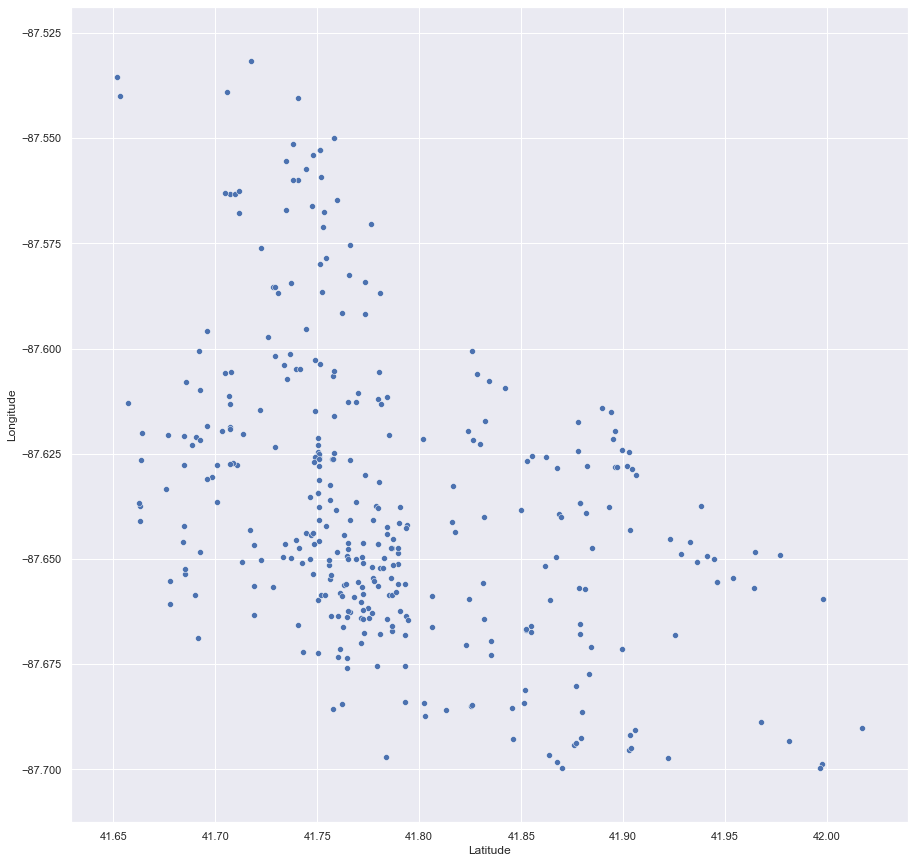

In [22]:
filtrado = separado[(separado["Latitude"]>40 ) & (separado["Longitude"]>-87.7 )]
separado=filtrado.loc[: , ['Latitude', 'Longitude']]
sns.scatterplot(data=separado, x="Latitude", y="Longitude");

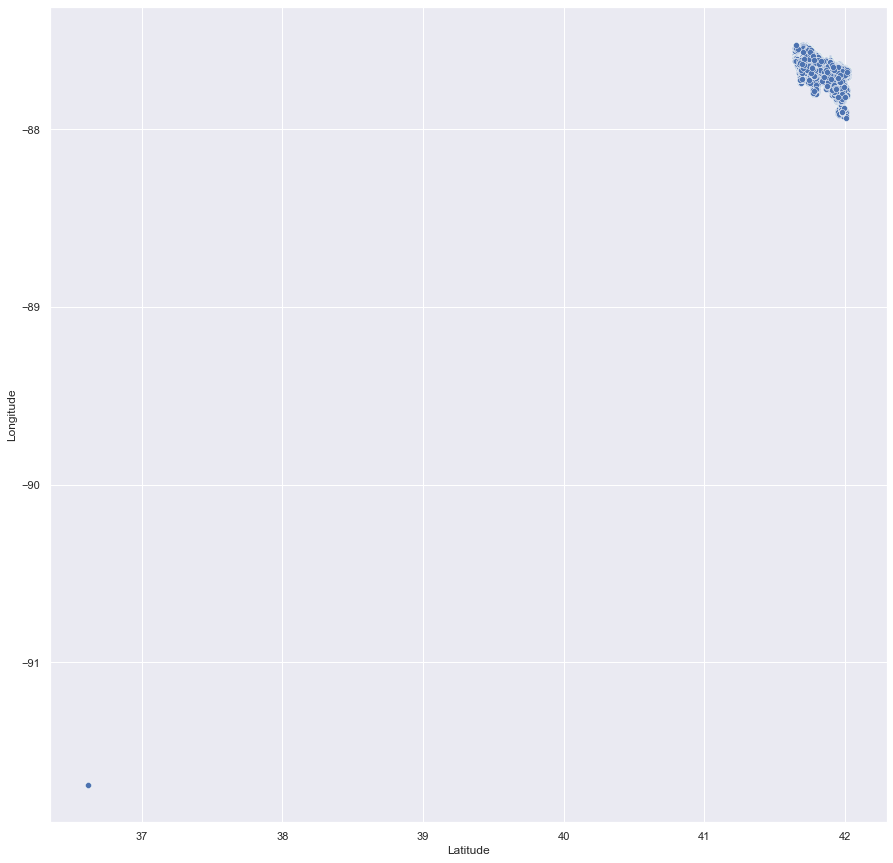

In [17]:
separado=data[2].loc[: , ['Latitude', 'Longitude']]
sns.scatterplot(data=separado, x="Latitude", y="Longitude");

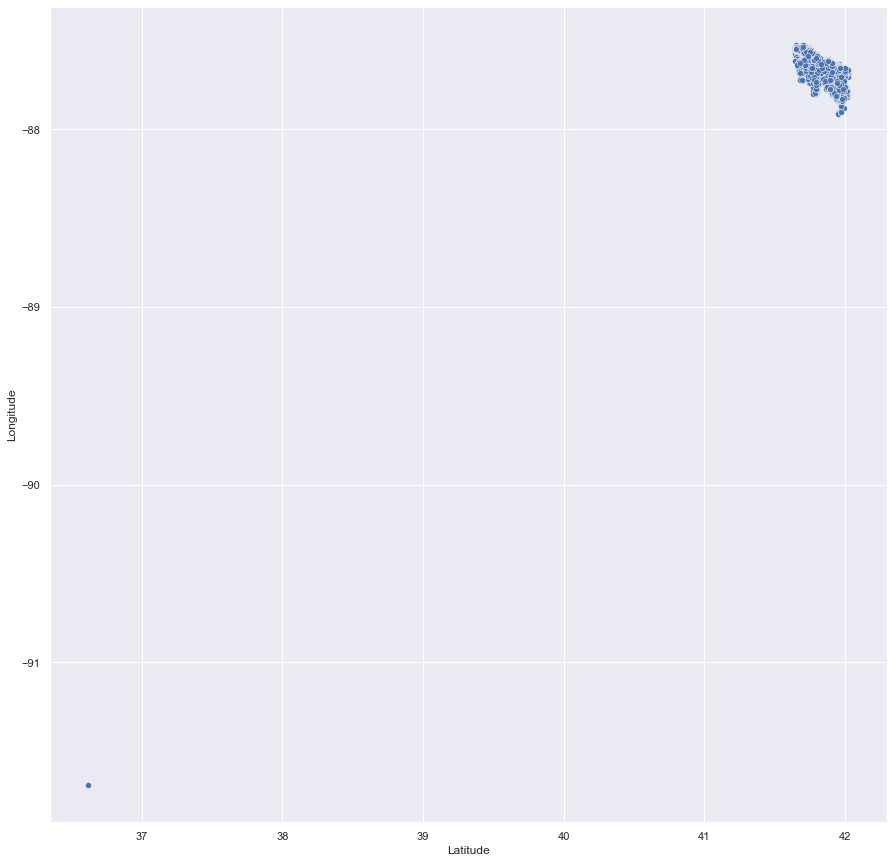

In [18]:
separado=data[3].loc[: , ['Latitude', 'Longitude']]
sns.scatterplot(data=separado, x="Latitude", y="Longitude");

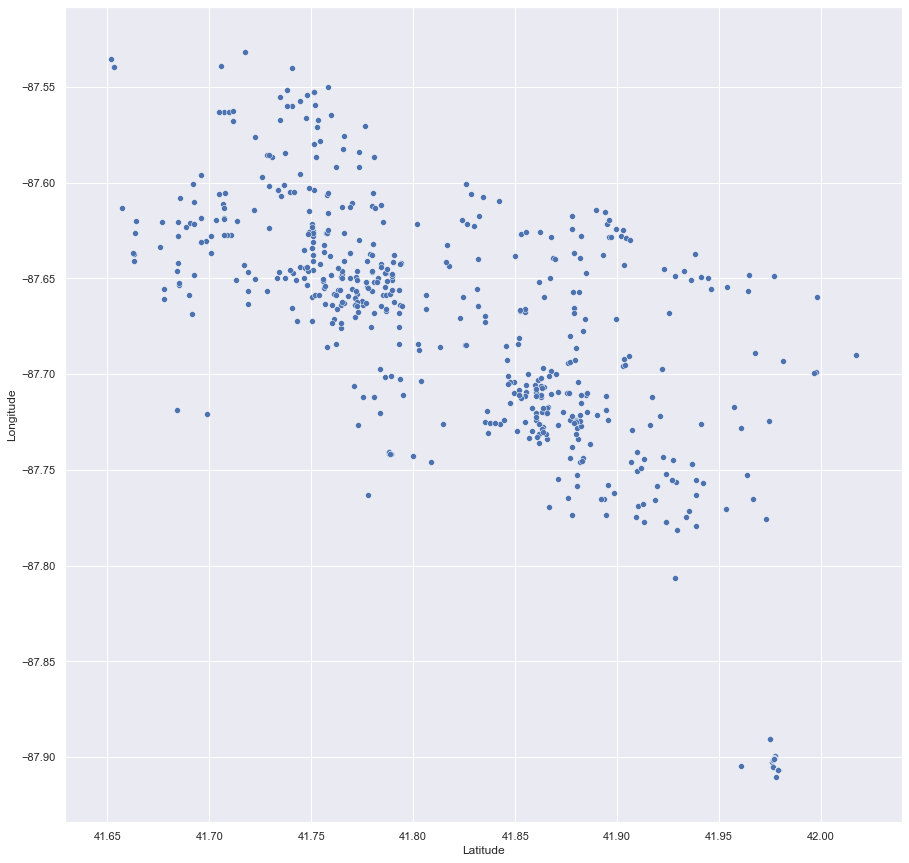

In [20]:
separado=data[4].loc[: , ['Latitude', 'Longitude']]
sns.scatterplot(data=separado, x="Latitude", y="Longitude");

District
8.0     495333
11.0    473480
7.0     430301
6.0     427347
25.0    420184
4.0     415740
3.0     372473
9.0     360780
12.0    359418
2.0     346438
19.0    326979
5.0     326231
18.0    325830
15.0    318099
10.0    316455
1.0     291107
Name: ID, dtype: int64


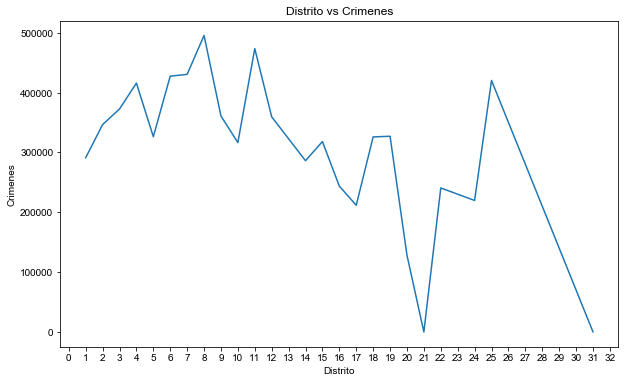

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

crimes_by_district = crimes_df.groupby('District').count()['ID'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Crimenes')
plt.xlabel('Distrito')
plt.ylabel('Crimenes')
sns.set_style('whitegrid')

District
19.0    12660645.0
25.0    12441680.0
18.0    11219496.0
11.0    11066334.0
24.0     9644193.0
16.0     9013161.0
15.0     8836970.0
8.0      7639163.0
17.0     6993837.0
10.0     6598978.0
7.0      5825491.0
5.0      5645601.0
12.0     5609202.0
6.0      5474731.0
22.0     5445174.0
1.0      5398669.0
Name: Ward, dtype: float64


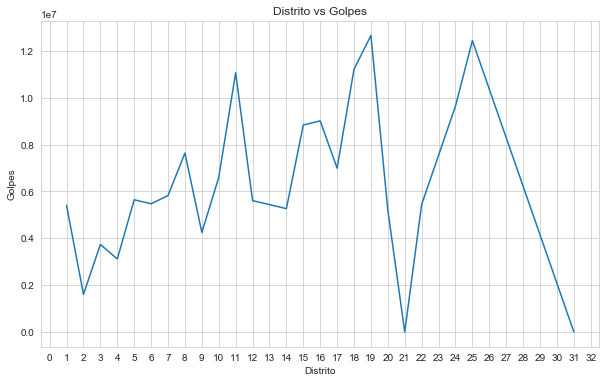

In [9]:
crimes_by_district = crimes_df.groupby('District').sum()['Ward'] 
print(crimes_by_district.sort_values(ascending = False)[ : 1])
crimes_by_district.plot(xticks = np.arange(0, 33, 1), figsize = (10,6))
plt.title('Distrito vs Golpes')
plt.xlabel('Distrito')
plt.ylabel('Golpes')
sns.set_style('whitegrid')

In [9]:
highest_crimes = crimes_df.sort_values(by = 'District', ascending = False)[:10]
highest_crimes.loc[: , ['ID', 'Primary Type','District']]

,ID,Primary Type,District
894453,11467984,CRIM SEXUAL ASSAULT,31.0
4681886,6719177,NARCOTICS,31.0
4363942,6275953,NARCOTICS,31.0
5069056,7245636,NARCOTICS,31.0
4386358,6309331,CRIMINAL TRESPASS,31.0
5643258,10148642,THEFT,31.0
7123830,12217585,OTHER OFFENSE,31.0
6839679,11271124,BATTERY,31.0
5504904,7848752,BATTERY,31.0
2307879,2868217,THEFT,31.0


In [19]:
crimes_by_district = crimes_df.groupby('District').count()['ID']
highest = crimes_by_district.sort_values( ascending = False)
print(highest)

District
8.0     495333
11.0    473480
7.0     430301
6.0     427347
25.0    420184
4.0     415740
3.0     372473
9.0     360780
12.0    359418
2.0     346438
19.0    326979
5.0     326231
18.0    325830
15.0    318099
10.0    316455
1.0     291107
14.0    286122
16.0    243699
22.0    240588
24.0    219693
17.0    211671
20.0    128355
31.0       207
21.0         4
Name: ID, dtype: int64


In [21]:
crimes_by_district = crimes_df.groupby('District').count()['Community Area']
highest = crimes_by_district.sort_values( ascending = False)
print(highest)

District
8.0     455919
11.0    437706
7.0     396571
6.0     395165
25.0    384964
4.0     383778
3.0     341841
9.0     329818
12.0    327640
2.0     303542
5.0     300461
19.0    297974
18.0    297307
15.0    292129
10.0    291643
1.0     271106
14.0    257892
16.0    225973
22.0    221532
24.0    200600
17.0    193391
20.0    115896
31.0       198
21.0         4
Name: Community Area, dtype: int64


In [23]:
crimes_by_district = crimes_df.groupby('District').count()['ID']
mean = crimes_by_district.mean()
print(mean)
variance = [ (x - mean) **2 for x in crimes_by_district]
variance = sum(variance) / len(variance)
print(variance)
desv=variance ** (1/2)
print(desv)

305688.9166666667


In [25]:
variance = [ (x - mean) **2 for x in crimes_by_district]
variance = sum(variance) / len(variance)
print(variance)

15682585478.743052


In [26]:
desv=variance ** (1/2)
print(desv)

125230.13007556548


In [11]:
grouped = crimes_sel.groupby("Primary Type")
class_labels = ['ARSON', 'ASSAULT', 'BATTERY','BURGLARY', 'CONCEALED CARRY LICENSE VIOLATION', 'CRIM SEXUAL ASSAULT', 'CRIMINAL DAMAGE', 'CRIMINAL SEXUAL ASSAULT', 'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE',
               'DOMESTIC VIOLENCE','GAMBLING','HOMICIDE','HUMAN TRAFFICKING','INTERFERENCE WITH PUBLIC OFFICER','INTIMIDATION','KIDNAPPING','LIQUOR LAW VIOLATION','MOTOR VEHICLE THEFT','NARCOTICS','NON - CRIMINAL','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)','OBSCENITY','OFFENSE INVOLVING CHILDREN','OTHER NARCOTIC VIOLATION','OTHER OFFENSE','PROSTITUTION','PUBLIC INDECENCY','PUBLIC PEACE VIOLATION','RITUALISM','ROBBERY','SEX OFFENSE','STALKING','THEFT','WEAPONS VIOLATION']
data=[]
for i in class_labels:
    data.append(grouped.get_group(i))

In [13]:
class_labels = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

sub1=[]
for i in range(len(data)):
    sub1.append(data[i].groupby("Year"))


In [14]:
class_labels = [2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]
total=[]
for i in range(len(class_labels)):
    data=[]
    for j in range(len(sub1)):
        if class_labels[i] in sub1[j]:
            data.append(sub1[j].get_group(class_labels[i]))
        else:
            data.append([0])
    total.append(data)

In [17]:
for i in range(len(total)):
    for j in range(len(sub1)):
        if(total[i][j]!=[0]):
            crimes_by_district = total[i][j].groupby('District').count()['ID']
            mean = crimes_by_district.mean()
            print(mean)
            variance = [ (x - mean) **2 for x in crimes_by_district]
            variance = sum(variance) / len(variance)
            print(variance)
            desv=variance ** (1/2)
            print(desv)
            print()